# Content-Based Recommender


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('movies.csv')

In [3]:
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies.shape

(9742, 3)

In [5]:
movies.tail(5)

,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [7]:
movies.isnull()

,movieId,title,genres
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
9737,False,False,False
9738,False,False,False
9739,False,False,False
9740,False,False,False


In [8]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [11]:
#extract title function
def extract_title(title):
    year = title[len(title)-5:len(title)-1]
    
    if year.isnumeric():
        title_no_year=title[:len(title)-7]
        return title_no_year
    else:
        return title

In [12]:
#extract year function
def extract_year(title):
    year = title[len(title)-5:len(title)-1]
    
    if year.isnumeric():
        return int(year)
    else:
        return np.nan

In [13]:
movies.rename(columns={'title':'title_year'}, inplace=True)
movies['title_year']=movies['title_year'].apply(lambda x:x.strip())
movies['title']=movies['title_year'].apply(extract_title)
movies['year']=movies['title_year'].apply(extract_year)

In [14]:
movies

,movieId,title_year,genres,title,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,Jumanji,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Waiting to Exhale,1995.0
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II,1995.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,Black Butler: Book of the Atlantic,2017.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,No Game No Life: Zero,2017.0
9739,193585,Flint (2017),Drama,Flint,2017.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,Bungo Stray Dogs: Dead Apple,2018.0


In [15]:
movies.isnull().sum()

movieId        0
title_year     0
genres         0
title          0
year          12
dtype: int64

# Explore Generes

In [37]:
r,c = movies[movies['genres']=='(no genres listed)'].shape 
print('The number of movies which do not have info about genres:',r)

The number of movies which do not have info about genres: 0


In [17]:
movies = movies[~(movies['genres']=='(no genres listed)')].reset_index(drop=True)

In [18]:
movies[['title','genres']].head(5)

,title,genres
0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji,Adventure|Children|Fantasy
2,Grumpier Old Men,Comedy|Romance
3,Waiting to Exhale,Comedy|Drama|Romance
4,Father of the Bride Part II,Comedy


In [19]:
movies['genres'] = movies['genres'].str.replace('|',' ')

<ipython-input-19-53f782c7a614>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies['genres']=movies['genres'].str.replace('|',' ')


In [20]:
movies

,movieId,title_year,genres,title,year
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,Toy Story,1995.0
1,2,Jumanji (1995),Adventure Children Fantasy,Jumanji,1995.0
2,3,Grumpier Old Men (1995),Comedy Romance,Grumpier Old Men,1995.0
3,4,Waiting to Exhale (1995),Comedy Drama Romance,Waiting to Exhale,1995.0
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II,1995.0
...,...,...,...,...,...
9703,193581,Black Butler: Book of the Atlantic (2017),Action Animation Comedy Fantasy,Black Butler: Book of the Atlantic,2017.0
9704,193583,No Game No Life: Zero (2017),Animation Comedy Fantasy,No Game No Life: Zero,2017.0
9705,193585,Flint (2017),Drama,Flint,2017.0
9706,193587,Bungo Stray Dogs: Dead Apple (2018),Action Animation,Bungo Stray Dogs: Dead Apple,2018.0


In [21]:
counts=dict()

for i in movies.index:
    for g in movies.loc[i,'genres'].split(' '):
        if g not in counts:
            counts[g]=1
        else:
            counts[g]=counts[g]+1
        

<Figure size 1800x600 with 0 Axes>

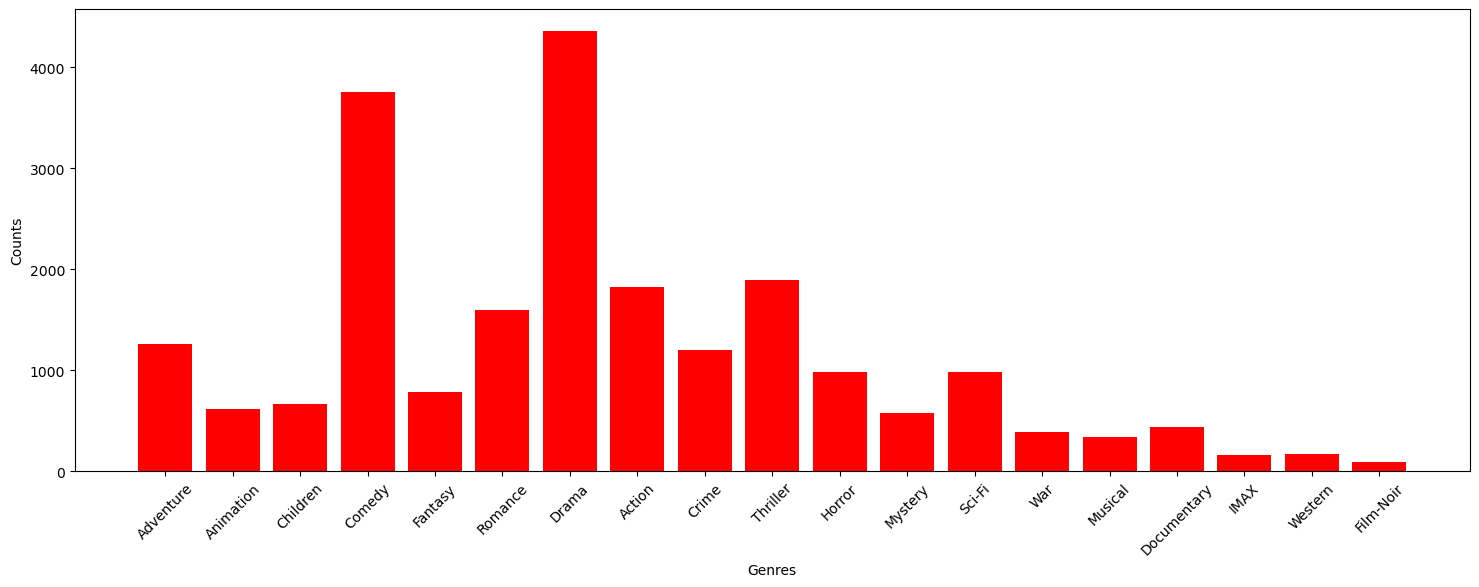

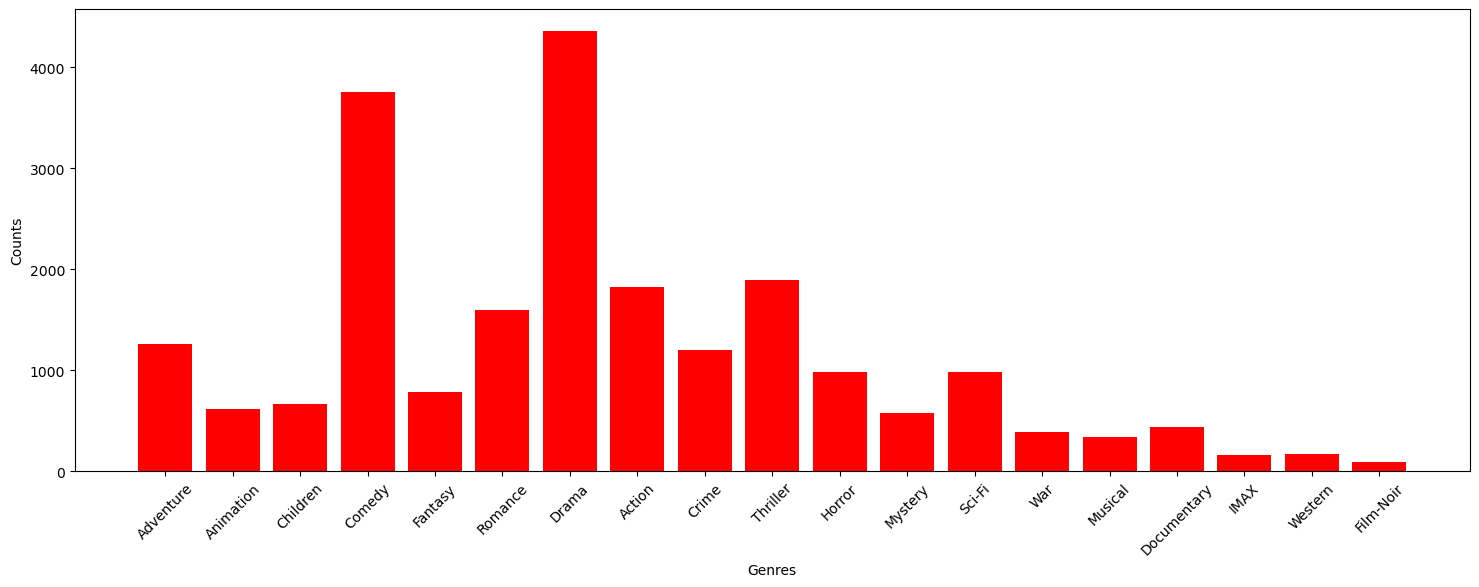

In [24]:
plt.figure(figsize=(18,6))
plt.bar(list(counts.keys()),counts.values(),color='r')
plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('Counts')
plt.show()

# Term Frequency and Inverse Document Frequency (tf-idf)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
movies['genres']=movies['genres'].str.replace('Sci-fi','Scifi')
movies['genres']=movies['genres'].str.replace('Film-Noir','Noir')

In [29]:
tfidf_vector=TfidfVectorizer(stop_words='english')
tfidf_matrix=tfidf_vector.fit_transform(movies['genres'])

In [30]:
print(list(enumerate(tfidf_vector.get_feature_names())))

[(0, 'action'), (1, 'adventure'), (2, 'animation'), (3, 'children'), (4, 'comedy'), (5, 'crime'), (6, 'documentary'), (7, 'drama'), (8, 'fantasy'), (9, 'fi'), (10, 'horror'), (11, 'imax'), (12, 'musical'), (13, 'mystery'), (14, 'noir'), (15, 'romance'), (16, 'sci'), (17, 'thriller'), (18, 'war'), (19, 'western')]


In [32]:
print(tfidf_matrix[:5])

  (0, 8)	0.48301747178653426
  (0, 4)	0.26738777563975086
  (0, 3)	0.5048957307474672
  (0, 2)	0.5162876752057701
  (0, 1)	0.41680359510322523
  (1, 8)	0.5936766667075072
  (1, 3)	0.6205672299106341
  (1, 1)	0.5122932056626417
  (2, 15)	0.8211549883098352
  (2, 4)	0.5707052524498741
  (3, 7)	0.46621627821471856
  (3, 15)	0.7264518207332316
  (3, 4)	0.5048862585582906
  (4, 4)	1.0


In [33]:
tfidf_matrix.shape

(9708, 20)

In [34]:
tfidf_matrix.todense()[0]

matrix([[0.        , 0.4168036 , 0.51628768, 0.50489573, 0.26738778,
         0.        , 0.        , 0.        , 0.48301747, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ]])

In [35]:
from sklearn.metrics.pairwise import linear_kernel

In [36]:
sim_matrix=linear_kernel(tfidf_matrix,tfidf_matrix)
print(sim_matrix)

[[1.         0.8136036  0.15259961 ... 0.         0.42114166 0.26738778]
 [0.8136036  1.         0.         ... 0.         0.         0.        ]
 [0.15259961 0.         1.         ... 0.         0.         0.57070525]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.42114166 0.         0.         ... 0.         1.         0.        ]
 [0.26738778 0.         0.57070525 ... 0.         0.         1.        ]]


# Make the Recommendation Engine

In [38]:
def get_title_year_from_index(index):
    return movies[movies.index==index]['title_year'].values[0]

def get_index_from_title(title):
    return movies[movies.title==title].index.values[0]

In [39]:
!pip install fuzzywuzzy

  Using cached fuzzywuzzy-0.18.0-py2.py3-none-any.whl (18 kB)


In [40]:
from fuzzywuzzy import fuzz

C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [41]:
def matching_score(a,b):
    return fuzz.ratio(a,b)

In [42]:
def get_title_from_index(index):
    return movies[movies.index==index]['title'].values[0]

In [43]:
def find_closest_title(title):
    leven_scores = list(enumerate(movies['title'].apply(matching_score, b=title)))
    sorted_leven_scores = sorted(leven_scores, key=lambda x: x[1], reverse=True)
    closest_title = get_title_from_index(sorted_leven_scores[0][0])
    distance_score = sorted_leven_scores[0][1]
    return closest_title, distance_score

# Recommend Movie

In [44]:
def contents_based_recommender(movie_user_likes, how_many):
    closest_title, distance_score = find_closest_title(movie_user_likes)
    if distance_score == 100:
        movie_index = get_index_from_title(closest_title)
        movie_list = list(enumerate(sim_matrix[int(movie_index)]))
        similar_movies = list(filter(lambda x:x[0] != int(movie_index), sorted(movie_list,key=lambda x:x[1], reverse=True))) # remove the typed movie itself

        print('Here\'s the list of movies similar to '+'\033[1m'+str(closest_title)+'\033[0m'+'.\n')

    for i,s in similar_movies[:how_many]: 
        print(get_title_year_from_index(i))
    

In [45]:
contents_based_recommender('Jumanji',20)

Here's the list of movies similar to Jumanji.

Indian in the Cupboard, The (1995)
NeverEnding Story III, The (1994)
Escape to Witch Mountain (1975)
Darby O'Gill and the Little People (1959)
Return to Oz (1985)
NeverEnding Story, The (1984)
NeverEnding Story II: The Next Chapter, The (1990)
Santa Claus: The Movie (1985)
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)
Chronicles of Narnia: The Lion, the Witch and the Wardrobe, The (2005)
Bridge to Terabithia (2007)
Golden Compass, The (2007)
Water Horse: Legend of the Deep, The (2007)
Chronicles of Narnia: Prince Caspian, The (2008)
Alice in Wonderland (1933)
Chronicles of Narnia: The Voyage of the Dawn Treader, The (2010)
Percy Jackson: Sea of Monsters (2013)
Seventh Son (2014)
The Cave of the Golden Rose (1991)
Pan (2015)
